In [115]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import sklearn
from sklearn import preprocessing


In [3]:
films = pd.read_csv('films_profit.csv')

In [4]:
films.head()

,title,release_week,runtime,budget,revenue,profit,animation,adventure,comedy,fantasy,family,horror,science fiction,thriller,genres,hit
0,Toy Story,44,81.0,30000000,373554033,156777016.5,1,0,1,0,1,0,0,0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1
1,Jumanji,50,104.0,65000000,262797249,66398624.5,0,1,0,1,1,0,0,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1
2,Waiting to Exhale,51,127.0,16000000,81452156,24726078.0,0,0,1,0,0,0,0,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0
3,Heat,50,170.0,60000000,187436818,33718409.0,0,0,0,0,0,0,0,1,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",0
4,Sudden Death,51,106.0,35000000,64350171,-2824914.5,0,1,0,0,0,0,0,1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",0


In [6]:
films.hit.value_counts()

 0    3740
-1     896
 1     753
Name: hit, dtype: int64

In [12]:
print films.shape
print "Hit rate:", 753/5389.

(5389, 16)
Hit rate: 0.139729077751


In [13]:
films.corr()

,release_week,runtime,budget,revenue,profit,animation,adventure,comedy,fantasy,family,horror,science fiction,thriller,hit
release_week,1.000000,0.127273,0.028936,0.034558,0.028286,0.016188,0.015328,-0.054461,-0.007646,0.012673,-0.041054,-0.028320,-0.023953,0.027287
runtime,0.127273,1.000000,0.192669,0.190057,0.132871,-0.211934,0.067566,-0.246059,-0.031648,-0.174122,-0.178144,-0.030904,-0.004475,0.055456
budget,0.028936,0.192669,1.000000,0.734253,0.340335,0.193761,0.379159,-0.052272,0.248664,0.220875,-0.127755,0.193480,0.020046,0.064797
revenue,0.034558,0.190057,0.734253,1.000000,0.888242,0.194943,0.322242,-0.030508,0.211556,0.211374,-0.083568,0.135774,-0.023834,0.525448
profit,0.028286,0.132871,0.340335,0.888242,1.000000,0.138901,0.189768,-0.006886,0.124760,0.143312,-0.029301,0.057136,-0.046577,0.683947
animation,0.016188,-0.211934,0.193761,0.194943,0.138901,1.000000,0.202769,0.070356,0.159828,0.573617,-0.083835,-0.001333,-0.140141,0.070761
adventure,0.015328,0.067566,0.379159,0.322242,0.189768,0.202769,1.000000,-0.066654,0.239975,0.252379,-0.123860,0.204391,-0.030377,0.056590
comedy,-0.054461,-0.246059,-0.052272,-0.030508,-0.006886,0.070356,-0.066654,1.000000,0.002171,0.157524,-0.158612,-0.128530,-0.336208,0.032747
fantasy,-0.007646,-0.031648,0.248664,0.211556,0.124760,0.159828,0.239975,0.002171,1.000000,0.279346,0.012888,0.093880,-0.097001,0.020129
family,0.012673,-0.174122,0.220875,0.211374,0.143312,0.573617,0.252379,0.157524,0.279346,1.000000,-0.113716,0.002534,-0.193536,0.059805


In [134]:
from sklearn.preprocessing import MinMaxScaler
films_data = films.set_index('title')

target = films_data.dropna().hit
films_data = films_data.drop(['hit', 'genres', 'revenue', 'profit'], axis=1).dropna()

scaler = MinMaxScaler()
films_data[['release_week', 'runtime', 'budget']] = scaler.fit_transform(films_data[['release_week', 
                                                                                     'runtime', 
                                                                                     'budget']])
films_data.head()

,release_week,runtime,budget,animation,adventure,comedy,fantasy,family,horror,science fiction,thriller
title,,,,,,,,,,,
Toy Story,0.830189,0.239645,0.078947,1,0,1,0,1,0,0,0
Jumanji,0.943396,0.307692,0.171053,0,1,0,1,1,0,0,0
Waiting to Exhale,0.962264,0.375740,0.042105,0,0,1,0,0,0,0,0
Heat,0.943396,0.502959,0.157895,0,0,0,0,0,0,0,1
Sudden Death,0.962264,0.313609,0.092105,0,1,0,0,0,0,0,1


In [175]:
X_train,X_test,y_train,y_test = train_test_split(films_data,target,test_size=.3)

In [140]:
#K-nearest neighbors

#1. import 
from sklearn.neighbors import KNeighborsClassifier

#2. instantiate

knn = KNeighborsClassifier(n_neighbors=2)

In [141]:


#3. fit (aka "train" on your labeled data)
knn.fit(X_train, y_train)

#4. Make new predictions or score
#films_data_sample = films_data.sample(5)
print X_test.index
#target["Drop Dead Fred"]

print "prediction:", knn.predict(X_test)


for i in X_test.index:
    print i, ":", y_test[i]
#print "actual: ", target[films_data_sample] 

Index([u'Sleepy Hollow', u'Femme Fatale', u'A Man for All Seasons',
       u'Never Talk to Strangers', u'Men of Honor'],
      dtype='object', name=u'title')
prediction: [ 0  0  0  0 -1]
Sleepy Hollow : 0
Femme Fatale : -1
A Man for All Seasons : 0
Never Talk to Strangers : 0
Men of Honor : 0


In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.model_selection import validation_curve, learning_curve
import graphviz

In [166]:
model = DecisionTreeClassifier(max_depth=5)

In [167]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [168]:
model.score(X_train, y_train)

0.738926008413759

In [169]:
model.score(X_test, y_test)

0.7112100965107646

[0.688412090623933,
 0.7101543498301295,
 0.7146632813894801,
 0.7008792863855373,
 0.7056468161290252,
 0.7056461088127526,
 0.6963612296075545,
 0.6934441426748061,
 0.6889345205734819,
 0.6836372081460693,
 0.6756796205072066,
 0.672234858860769,
 0.6605609560411044,
 0.6544657629009876,
 0.6539366567804541,
 0.650223134520428,
 0.6510217085708224,
 0.6480997095641964,
 0.6449191403305979]

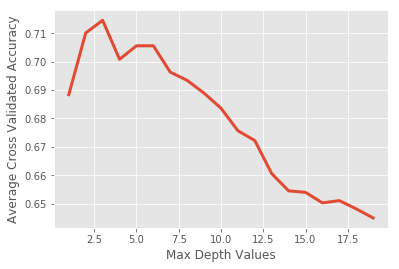

In [176]:
#Answer
max_depths = range(1, 20)

cv_scores = []

for i in range(1, 20):
    cv_score = cross_val_score(DecisionTreeClassifier(max_depth=i), X_train, y_train, cv=5, scoring = "accuracy")
    cv_scores.append(cv_score.mean())


plt.plot(max_depths, cv_scores, linewidth = 3)
plt.xlabel("Max Depth Values")
plt.ylabel("Average Cross Validated Accuracy");

cv_scores


In [177]:
#Assign best depth value to depth
depth = 3

In [178]:
#Train and test with random state = 4 and test size = .25
X_train, X_test, y_train, y_test = train_test_split(films_data, target, test_size = .25, random_state = 4)


#Fit model with best depth value
model = DecisionTreeClassifier(max_depth = depth)
model.fit(X_train, y_train)

#Score model on test set
testscore = model.score(X_test, y_test)

print ("The test score is {:.3f} percent".format(testscore*100))

The test score is 70.453 percent


,release_week,runtime,budget,animation,adventure,comedy,fantasy,family,horror,science fiction,thriller
title,,,,,,,,,,,
Toy Story,0.830189,0.239645,0.078947,1,0,1,0,1,0,0,0
Jumanji,0.943396,0.307692,0.171053,0,1,0,1,1,0,0,0
Waiting to Exhale,0.962264,0.375740,0.042105,0,0,1,0,0,0,0,0
Heat,0.943396,0.502959,0.157895,0,0,0,0,0,0,0,1
Sudden Death,0.962264,0.313609,0.092105,0,1,0,0,0,0,0,1
GoldenEye,0.867925,0.384615,0.152632,0,1,0,0,0,0,0,1
The American President,0.867925,0.313609,0.163158,0,0,1,0,0,0,0,0
Nixon,0.962264,0.568047,0.115789,0,0,0,0,0,0,0,0
Cutthroat Island,0.962264,0.352071,0.257895,0,1,0,0,0,0,0,0
